# Import packages

In [1]:
# ! pip install xgboost # Uncomment this line if you haven't installed xgboost 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, roc_auc_score, classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import xgboost as xgb
import re

# Prepare data

In [2]:
df = pd.read_csv("yfinance_2016_2019.csv")

In [3]:
df.columns

Index(['Date', 'btc', 'oil', 'ethereum', 'euro', 'gold', 'tether', 'dow', 'sp',
       'nasdaq', 'tenyear', 'btc_ytd', 'btc_change_ytd', 'oil_ytd',
       'oil_change_ytd', 'ethereum_ytd', 'ethereum_change_ytd', 'euro_ytd',
       'euro_change_ytd', 'gold_ytd', 'gold_change_ytd', 'tether_ytd',
       'tether_change_ytd', 'dow_ytd', 'dow_change_ytd', 'sp_ytd',
       'sp_change_ytd', 'nasdaq_ytd', 'nasdaq_change_ytd', 'tenyear_ytd',
       'tenyear_change_ytd', 'btc_tmr', 'btc_change_tmr', 'oil_tmr',
       'oil_change_tmr', 'ethereum_tmr', 'ethereum_change_tmr', 'euro_tmr',
       'euro_change_tmr', 'gold_tmr', 'gold_change_tmr', 'tether_tmr',
       'tether_change_tmr', 'dow_tmr', 'dow_change_tmr', 'sp_tmr',
       'sp_change_tmr', 'nasdaq_tmr', 'nasdaq_change_tmr', 'tenyear_tmr',
       'tenyear_change_tmr'],
      dtype='object')

In [4]:
df.shape

(1421, 51)

# Set the label 
we're going to predict: whether tomorrow's  price will be higher 

In [5]:
# Predcition target 
label = df.btc_change_tmr

# Define a function for assessing model performance

In [6]:
# Define a function to evaluate model performance 
def model_performance(true, pred, name=None, print_=False, confusion=False):
    accuracy = accuracy_score(true, pred)
    precision = precision_score(true, pred)
    f1 = f1_score(true, pred)
    recall = recall_score(true, pred)
    roc_auc = roc_auc_score(true, pred)
    
    if print_:
        print('Accuracy : ', accuracy)
        print('Precision : ', precision)
        print('F1 Score : ', f1)
        print('Recall : ', recall)
        print('ROC AUC : ', roc_auc)


    if confusion:
        fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(true, pred))
        plt.show()

    return [name, accuracy, precision, f1, recall, roc_auc]

# Bitcoin price concurrent movement comove with other financial variable

In [33]:
features_name =  ['oil_change_tmr', 'ethereum_change_tmr', 
                  'euro_change_tmr', 'gold_change_tmr', 
                  'tether_change_tmr', 'dow_change_tmr', 
                  'sp_change_tmr', 'nasdaq_change_tmr',
                  'tenyear_change_tmr']

In [34]:
features_tmr = df[features_name]

In [35]:
# Split the data into train (80%) and test (20%) set.
X_train, X_test, y_train, y_test = train_test_split(features_tmr, label, test_size=0.2, random_state=42)

In [36]:
# Baseline model: Random Forest 
rf_tmr = RandomForestClassifier(random_state=42).fit(X_train,y_train)
preds_rf_tmr = pd.Series(rf_tmr.predict(X_test), index=y_test.index)

Accuracy :  0.5929824561403508
Precision :  0.5902439024390244
F1 Score :  0.6759776536312848
Recall :  0.7908496732026143
ROC AUC :  0.577243018419489


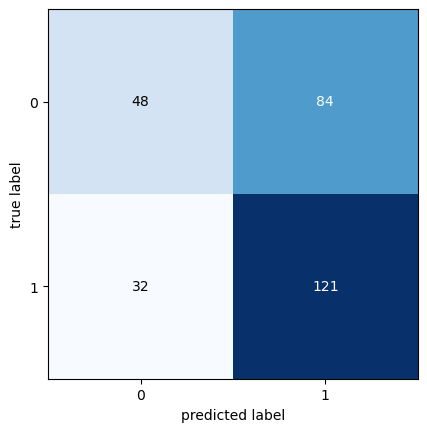

[None,
 0.5929824561403508,
 0.5902439024390244,
 0.6759776536312848,
 0.7908496732026143,
 0.577243018419489]

[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.6s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=   2.3s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   0.9s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.5s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.9s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2000; total time=   2.2s
[CV] END bootstrap=True, max_depth=20

/Users/tanyangfan/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/tanyangfan/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/tanyangfan/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   1.4s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=   2.3s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.7s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.3s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2000; total time=   2.2s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1800; total time=   2.1s
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.9s
[CV] END bootstrap=False, max_depth=

/Users/tanyangfan/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/tanyangfan/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/tanyangfan/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   3.0s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.3s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.9s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=   1.9s
[CV] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   0.8s
[CV] END bootstrap=False, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1800; total time=   2.1s
[CV] END bootstrap=True, max_depth

/Users/tanyangfan/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/tanyangfan/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/tanyangfan/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.6s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=   2.3s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=   2.1s
[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.6s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.9s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=   1.9s
[CV] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   0.7s
[CV] END bootstrap=True, max_depth=20, m

/Users/tanyangfan/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/tanyangfan/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/tanyangfan/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove 

In [37]:
model_performance(y_test, preds_rf_tmr, print_=True, confusion=True)

In [12]:
# Explore correlation between movement labels 
movement_tmr = df[['btc_change_tmr', 'oil_change_tmr', 'ethereum_change_tmr', 'euro_change_tmr', 'gold_change_tmr', 'tether_change_tmr', 'dow_change_tmr', 'sp_change_tmr', 'nasdaq_change_tmr','tenyear_change_tmr']]
movement_tmr.corr()

,btc_change_tmr,oil_change_tmr,ethereum_change_tmr,euro_change_tmr,gold_change_tmr,tether_change_tmr,dow_change_tmr,sp_change_tmr,nasdaq_change_tmr,tenyear_change_tmr
btc_change_tmr,1.000000,0.008005,0.314460,-0.024928,0.013059,-0.013809,-0.022534,-0.005359,-0.008124,-0.034045
oil_change_tmr,0.008005,1.000000,-0.020690,0.346034,0.363155,-0.020422,0.505166,0.516552,0.493812,0.440212
ethereum_change_tmr,0.314460,-0.020690,1.000000,-0.017741,0.000266,0.340304,-0.001334,0.006604,-0.006712,-0.038785
euro_change_tmr,-0.024928,0.346034,-0.017741,1.000000,0.287108,-0.014445,0.351824,0.342718,0.331094,0.270501
gold_change_tmr,0.013059,0.363155,0.000266,0.287108,1.000000,0.047173,0.283247,0.325562,0.334510,0.097162
tether_change_tmr,-0.013809,-0.020422,0.340304,-0.014445,0.047173,1.000000,-0.004515,0.006996,-0.006286,-0.073406
dow_change_tmr,-0.022534,0.505166,-0.001334,0.351824,0.283247,-0.004515,1.000000,0.837517,0.699922,0.499005
sp_change_tmr,-0.005359,0.516552,0.006604,0.342718,0.325562,0.006996,0.837517,1.000000,0.814865,0.464952
nasdaq_change_tmr,-0.008124,0.493812,-0.006712,0.331094,0.334510,-0.006286,0.699922,0.814865,1.000000,0.453052
tenyear_change_tmr,-0.034045,0.440212,-0.038785,0.270501,0.097162,-0.073406,0.499005,0.464952,0.453052,1.000000


*btc_change_tmr* highly correlates with *ethereum_change_tmr*! <br>
Now confirm the feature importance in this RF model.

In [13]:
feature_im = pd.DataFrame({'importance':rf_tmr.feature_importances_,'feature':features_name}).sort_values(by='importance',ascending=False)
feature_im

,importance,feature
1,0.370993,ethereum_change_tmr
4,0.101108,tether_change_tmr
3,0.094433,gold_change_tmr
8,0.079969,tenyear_change_tmr
0,0.077716,oil_change_tmr
2,0.073266,euro_change_tmr
7,0.071994,nasdaq_change_tmr
5,0.070145,dow_change_tmr
6,0.060375,sp_change_tmr


What happens if we drop ethereum_change_tmr?

In [14]:
features_tmr_2 = df[['oil_change_tmr', 'euro_change_tmr', 
                     'gold_change_tmr', 'tether_change_tmr', 
                     'dow_change_tmr', 'sp_change_tmr', 
                     'nasdaq_change_tmr','tenyear_change_tmr']]

Accuracy :  0.49473684210526314
Precision :  0.51931330472103
F1 Score :  0.626943005181347
Recall :  0.7908496732026143
ROC AUC :  0.4711824123588829


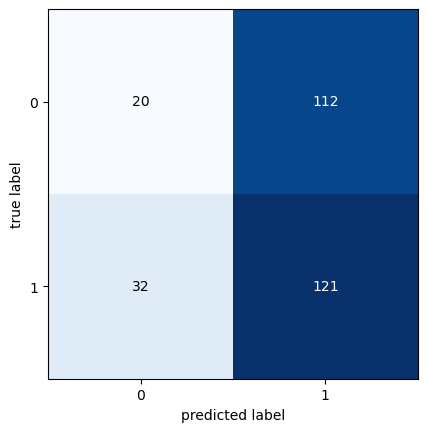

[None,
 0.49473684210526314,
 0.51931330472103,
 0.626943005181347,
 0.7908496732026143,
 0.4711824123588829]

In [15]:
# Split the data into train (80%) and test (20%) set.
X_train, X_test, y_train, y_test = train_test_split(features_tmr_2, label, test_size=0.2, random_state=42)

# Baseline model: Random Forest 
rf_tmr_2 = RandomForestClassifier(random_state=42).fit(X_train,y_train)
preds_rf_tmr_2 = pd.Series(rf_tmr_2.predict(X_test), index=y_test.index)
model_performance(y_test, preds_rf_tmr_2, print_=True, confusion=True)

Accuracy drops drastically! Worse than random guessing!

# Bitcoin price movement comove with other financial variable: lagged 
In reality we couldn't know the change of other financial variables at the same with Bitcoin price, either.

In [16]:
features_ytd = df[['btc_change_ytd', 'oil_change_ytd', 
                   'ethereum_change_ytd', 'euro_change_ytd', 
                   'gold_change_ytd', 'tether_change_ytd', 
                   'dow_change_ytd', 'sp_change_ytd', 
                   'nasdaq_change_ytd','tenyear_change_ytd']]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(features_ytd, label, test_size=0.2, random_state=42)

## 1. Baseline model: Random Forest 

In [18]:
rf_ytd = RandomForestClassifier(n_estimators=100, min_samples_split=50, random_state=42).fit(X_train,y_train)
preds_rf_ytd = pd.Series(rf_ytd.predict(X_test), index=y_test.index)

In [19]:
perf_rf_ytd = model_performance(y_test, preds_rf_ytd, name='Random Forest', print_=True)

Accuracy :  0.5578947368421052
Precision :  0.5555555555555556
F1 Score :  0.6818181818181819
Recall :  0.8823529411764706
ROC AUC :  0.5320855614973261


In [20]:
# Report model performance in a table 
columns = ['Model', 'Accuracy', 'Precision', 'F1_Score', 'Recall', 'AUC']
model_metrics = []
model_metrics.append(perf_rf_ytd)
results_df = pd.DataFrame(columns=columns, data=model_metrics)
results_df.head()

,Model,Accuracy,Precision,F1_Score,Recall,AUC
0,Random Forest,0.557895,0.555556,0.681818,0.882353,0.532086


## 2. Tune RF

In [21]:
# RF looks promising (better than random guessing!). Continue by searching for more optimal hyperparameters.

rf = RandomForestClassifier(n_estimators=100, min_samples_split=50, random_state=42)

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
print(rf.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 50, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [22]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [23]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [24]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


### Model 2 Random forest with tuned Hyperparameters

In [25]:
rf_random.best_params_

{'n_estimators': 1600,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [26]:
rf_random.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_leaf=4, n_estimators=1600,
                       random_state=42)

In [27]:
best_rf = rf_random.best_estimator_.fit(X_train, y_train)

preds_best_rf = best_rf.predict(X_test)

preds_best_rf = pd.Series(preds_best_rf, index=y_test.index, name="predictions")

best_rf_perf = model_performance(y_test, preds_best_rf, name='Tuned RF', print_=True)

model_metrics.append(best_rf_perf)
results_df = pd.DataFrame(columns=columns, data=model_metrics)
results_df.head()

Accuracy :  0.5614035087719298
Precision :  0.5614035087719298
F1 Score :  0.6719160104986875
Recall :  0.8366013071895425
ROC AUC :  0.5395127748068924


,Model,Accuracy,Precision,F1_Score,Recall,AUC
0,Random Forest,0.557895,0.555556,0.681818,0.882353,0.532086
1,Tuned RF,0.561404,0.561404,0.671916,0.836601,0.539513


## Model 3: Decision Tree by default

In [28]:
dt = DecisionTreeClassifier().fit(X_train, y_train)
preds_dt = pd.Series(dt.predict(X_test), index=y_test.index)

perf_dt = model_performance(y_test, preds_dt, name='Decision Tree')
model_metrics.append(perf_dt)
results_df = pd.DataFrame(columns=columns, data=model_metrics)
results_df

,Model,Accuracy,Precision,F1_Score,Recall,AUC
0,Random Forest,0.557895,0.555556,0.681818,0.882353,0.532086
1,Tuned RF,0.561404,0.561404,0.671916,0.836601,0.539513
2,Decision Tree,0.529825,0.550802,0.605882,0.673203,0.518419


## Model 4: KNN by default

In [29]:
knn = KNeighborsClassifier().fit(X_train, y_train)
preds_knn = pd.Series(knn.predict(X_test), index=y_test.index)

perf_knn = model_performance(y_test, preds_knn, name='KNN')
model_metrics.append(perf_knn)
results_df = pd.DataFrame(columns=columns, data=model_metrics)
results_df

,Model,Accuracy,Precision,F1_Score,Recall,AUC
0,Random Forest,0.557895,0.555556,0.681818,0.882353,0.532086
1,Tuned RF,0.561404,0.561404,0.671916,0.836601,0.539513
2,Decision Tree,0.529825,0.550802,0.605882,0.673203,0.518419
3,KNN,0.487719,0.518919,0.568047,0.627451,0.476604


## Model 5: XGBoost

In [30]:
bst = xgb.XGBClassifier(random_state=1, n_estimators=200, learning_rate=0.1).fit(X_train, y_train)
preds_bst = pd.Series(bst.predict(X_test), index=y_test.index)

perf_bst = model_performance(y_test, preds_bst, name='XGBoost')
model_metrics.append(perf_bst)
results_df = pd.DataFrame(columns=columns, data=model_metrics)
results_df

,Model,Accuracy,Precision,F1_Score,Recall,AUC
0,Random Forest,0.557895,0.555556,0.681818,0.882353,0.532086
1,Tuned RF,0.561404,0.561404,0.671916,0.836601,0.539513
2,Decision Tree,0.529825,0.550802,0.605882,0.673203,0.518419
3,KNN,0.487719,0.518919,0.568047,0.627451,0.476604
4,XGBoost,0.536842,0.554974,0.616279,0.692810,0.524436


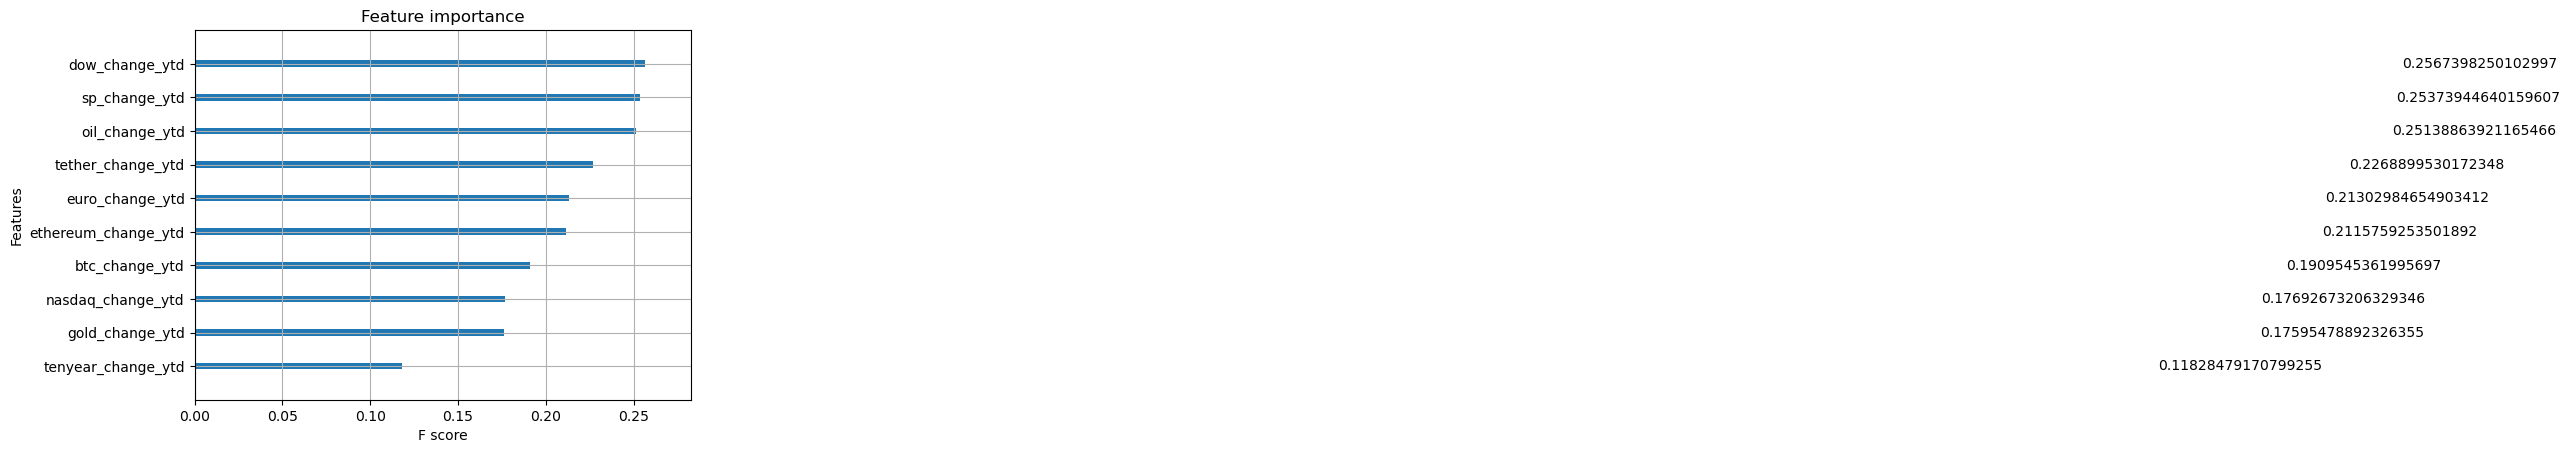

In [31]:
# Feature importance 
xgb.plot_importance(bst, importance_type='gain');

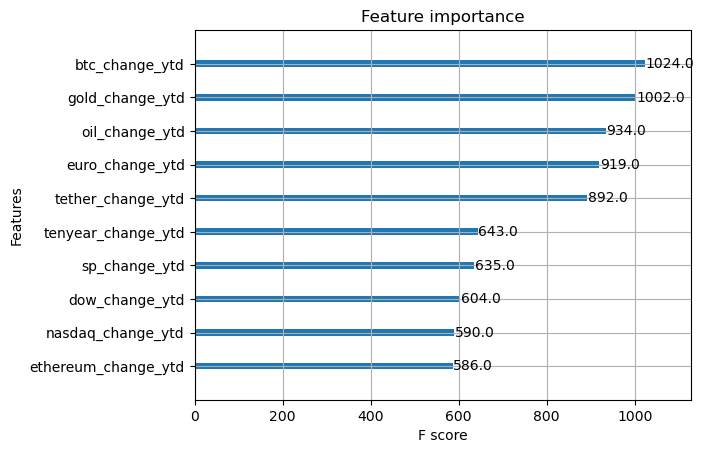

In [32]:
xgb.plot_importance(bst);